In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [7]:
num_classes = len(np.unique(y_train))
category = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

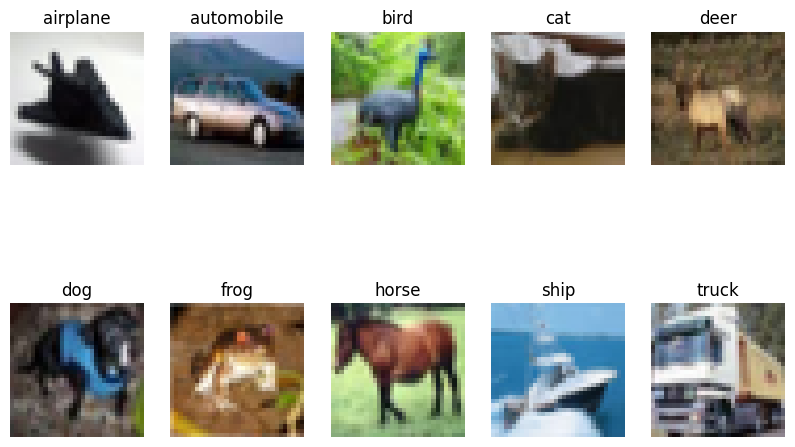

In [8]:
#plotting the image of every class
plt.figure(figsize = (10,10))
for i in range (num_classes):
    axs = plt.subplot(3, 5, i+1)
    idx = np.where(y_train[:]==i)[0]
    x = X_train[idx,::]
    plt.imshow(x[0])
    axs.set_title(category[i])
    plt.axis("off")

In [9]:
# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# Onehot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
#Defining the model
model = Sequential([
    layers.Conv2D(32, (3,3), input_shape = X_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [13]:
#Compiling the model using various matrices
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

In [15]:
seed =21
np.random.seed(seed)
epochs =10
batch_size = 32
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs, batch_size = batch_size)

Epoch 1/10
1250/1250 [==============================] - 12s 5ms/step - loss: 1.4867 - accuracy: 0.4572 - val_loss: 1.1505 - val_accuracy: 0.5841
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0712 - accuracy: 0.6188 - val_loss: 0.9775 - val_accuracy: 0.6598
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9130 - accuracy: 0.6824 - val_loss: 0.9091 - val_accuracy: 0.6793
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8137 - accuracy: 0.7132 - val_loss: 0.8531 - val_accuracy: 0.6912
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7281 - accuracy: 0.7425 - val_loss: 0.8407 - val_accuracy: 0.7092
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6565 - accuracy: 0.7701 - val_loss: 0.7913 - val_accuracy: 0.7287
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.5931 - accuracy: 0.7905 - val_loss: 0.7760 - val_accuracy

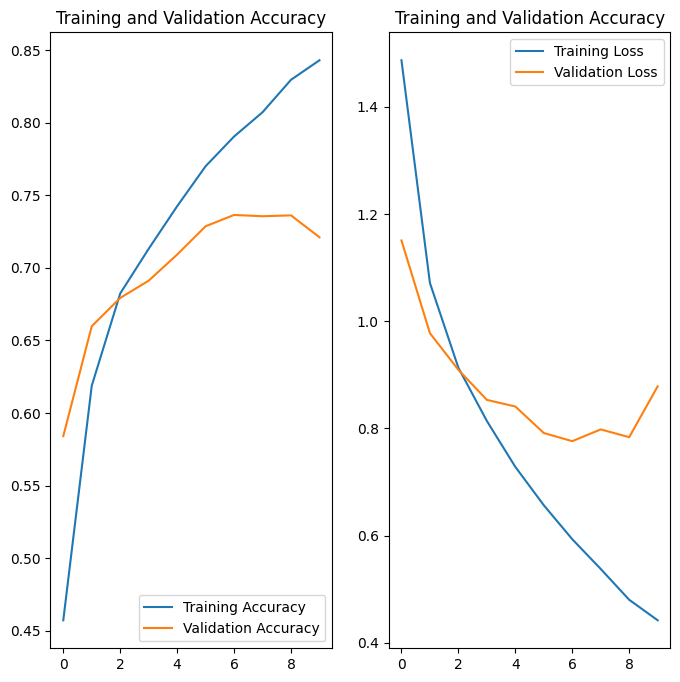

In [16]:
#plotting the loss and accuracy curve

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [17]:
# Evaluate the model on the test set
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8594 - accuracy: 0.7237
Test Accuracy of Base Model: 0.7236999869346619


In [ ]:
model = Sequential([
    layers.Conv2D(32, (3,3), input_shape = X_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
optimizer = keras.optimizers.RMSprop (learning_rate = 0.0001, weight_decay= 1e-6)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
speed=21
np.random.seed(seed)
epochs=50
batch_size = 32
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs, batch_size = batch_size)

Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 2.0499 - accuracy: 0.2458 - val_loss: 1.8203 - val_accuracy: 0.3598
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7632 - accuracy: 0.3623 - val_loss: 1.6320 - val_accuracy: 0.4124
Epoch 3/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6248 - accuracy: 0.4058 - val_loss: 1.5296 - val_accuracy: 0.4510
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5404 - accuracy: 0.4398 - val_loss: 1.4743 - val_accuracy: 0.4678
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4771 - accuracy: 0.4634 - val_loss: 1.3972 - val_accuracy: 0.4958
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4312 - accuracy: 0.4826 - val_loss: 1.3338 - val_accuracy: 0.5216
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3929 - accuracy: 0.4994 - val_loss: 1.2874 - val_accuracy:

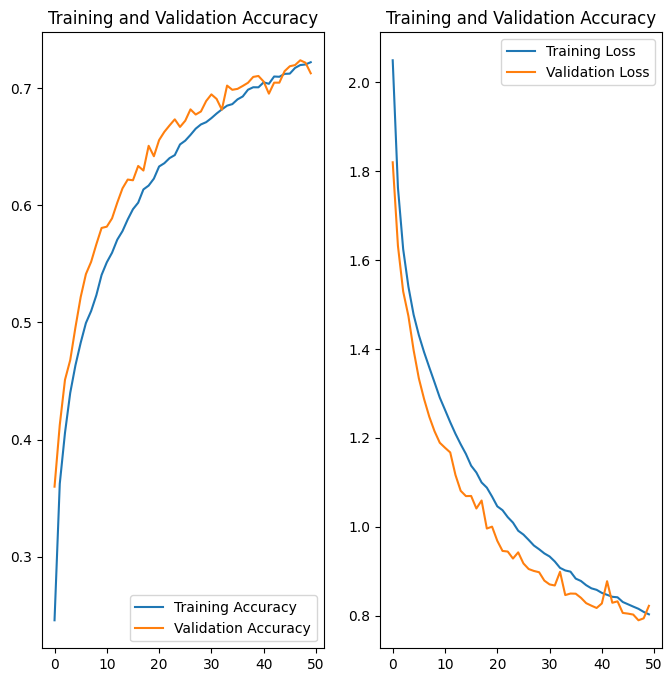

In [ ]:
#plotting the loss and accuracy curve

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.8380 - accuracy: 0.7076
Test Accuracy of Base Model: 0.7075999975204468


In [ ]:
#Turning the mdoel with 4 dropouts and 8 activation layers expecting better training accuracy

model_3 = Sequential([
    layers.Conv2D(32, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
model_3.compile(optimizer='adam', loss =keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs, batch_size = batch_size)

Epoch 1/50
1250/1250 [==============================] - 15s 8ms/step - loss: 1.7618 - accuracy: 0.3907 - val_loss: 1.4068 - val_accuracy: 0.4950
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2126 - accuracy: 0.5669 - val_loss: 1.0985 - val_accuracy: 0.6042
Epoch 3/50
1250/1250 [==============================] - 9s 8ms/step - loss: 1.0388 - accuracy: 0.6357 - val_loss: 0.8962 - val_accuracy: 0.6829
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9340 - accuracy: 0.6767 - val_loss: 0.7657 - val_accuracy: 0.7249
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8604 - accuracy: 0.7024 - val_loss: 0.7175 - val_accuracy: 0.7471
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8049 - accuracy: 0.7211 - val_loss: 0.6900 - val_accuracy: 0.7549
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7626 - accuracy: 0.7385 - val_loss: 0.7002 - val_accurac

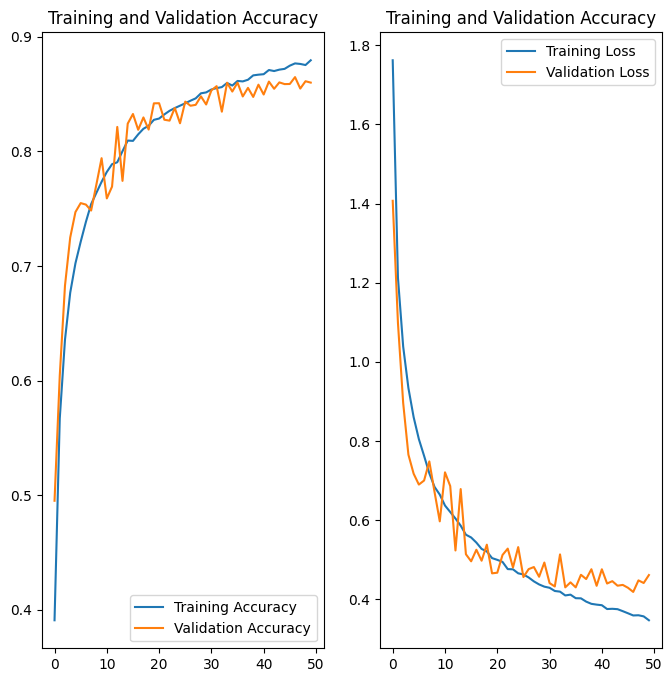

In [ ]:
#plotting the loss and accuracy curve

acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
evaluation = model_3.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4705 - accuracy: 0.8578
Test Accuracy of Base Model: 0.8578000068664551


In [ ]:
#Turning the mdoel with 4 dropouts and 8 activation layers expecting better training accuracy

model_4 = Sequential([
    layers.Conv2D(32, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(256, (3,3), input_shape = (32,32,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_17 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
model_4.compile(optimizer='adam', loss =keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [ ]:
epochs = 35
history_4 = model_4.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=epochs, batch_size = batch_size)

Epoch 1/35
1250/1250 [==============================] - 16s 9ms/step - loss: 1.8480 - accuracy: 0.3599 - val_loss: 1.3338 - val_accuracy: 0.5095
Epoch 2/35
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2877 - accuracy: 0.5385 - val_loss: 1.1723 - val_accuracy: 0.5759
Epoch 3/35
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0910 - accuracy: 0.6166 - val_loss: 1.2283 - val_accuracy: 0.5754
Epoch 4/35
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9607 - accuracy: 0.6690 - val_loss: 0.8680 - val_accuracy: 0.6990
Epoch 5/35
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8766 - accuracy: 0.6994 - val_loss: 0.8963 - val_accuracy: 0.6911
Epoch 6/35
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8020 - accuracy: 0.7265 - val_loss: 0.8887 - val_accuracy: 0.6982
Epoch 7/35
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7486 - accuracy: 0.7449 - val_loss: 0.7237 - val_ac

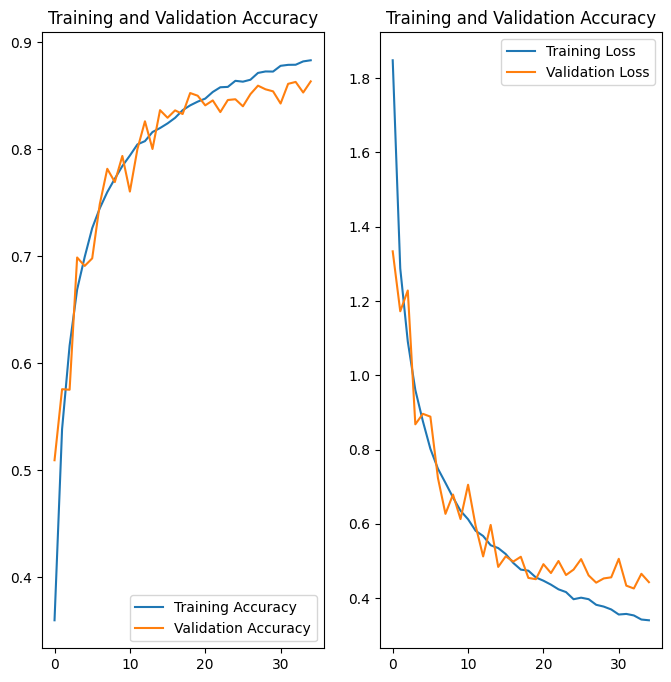

In [ ]:
#plotting the loss and accuracy curve

acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
evaluation = model_4.evaluate(X_test, y_test)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.8592
Test Accuracy of Base Model: 0.8592000007629395
